In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

### 1 a. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable

In [2]:
c1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
c1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


### 1 b.Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable

In [3]:
c2 = pd.read_csv('TelcomCustomer-Churn_2.csv')
c2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1 c.Merge both the DataFrames on key ‘customerID’ to form a single DataFrame 

In [4]:
df = c1.merge(c2,on="customerID")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1 d.Verify if all the columns are incorporated in the merged DataFrame by using simple comparisonOperator in Python

In [6]:
c1.shape

(7043, 10)

In [7]:
c2.shape

(7043, 12)

In [8]:
df.shape

(7043, 21)

In [9]:
# Checking if every column in c1 is present in merged dataframe
all([True for col in c1.columns if col in df.columns])

True

In [10]:
# Checking if every column in c2 is present in merged dataframe
all([True for col in c2.columns if col in df.columns])

True

### 2 a Impute missing/unexpected values in the DataFrame

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
for col in df.columns:
    if df[col].dtype == "object":
        print(df[col].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


#### Note: Total charges has floats but is classified as type object. We must change it to type float and see if that works. If it doesn't it must have some unexpected values.

In [14]:
#   df['TotalCharges'] = df['TotalCharges'].astype(np.float64)
# produces an error -> saying cannot convert string ' ' to float

In [15]:
df['TotalCharges'][df['TotalCharges'] == " "].shape

(11,)

In [16]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=" ",strategy="constant", fill_value="0.0")

df['TotalCharges'] = pd.Series(imp.fit_transform(df['TotalCharges'].to_numpy().reshape(-1,1)).reshape(df.shape[0]))


In [17]:
df['TotalCharges'] = df['TotalCharges'].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


####  ---- Successfully imputed unexpected values

### 2 b Make sure all the variables with continuous values are of ‘Float’ type

In [18]:
for col in df.columns:
    if df[col].dtype == np.int64:
        df[col] = df[col].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 2 c Create a function that will accept a DataFrame as input and return pie-charts for all theappropriate Categorical features. Clearly show percentage distribution in the pie-chart.

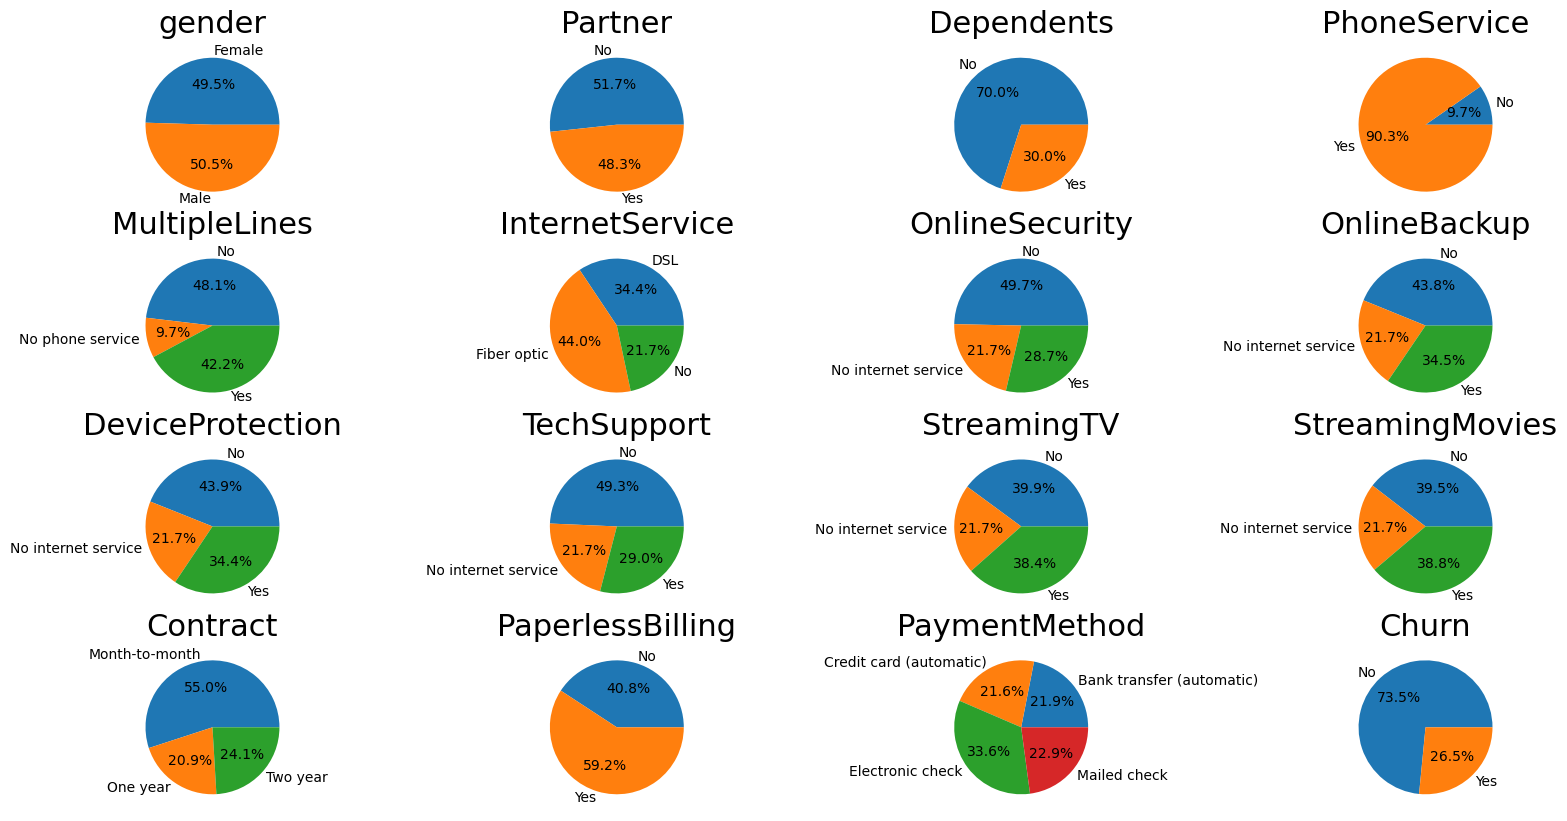

In [19]:
def pieChartMaker(dataFrame: pd.DataFrame = df):
    """
    Will accept a Dataframe -> default given as df. 
    Returns Pie charts for all categorical features.
    Will work for any data frame that has less than or equal to 16 categorical values.
    """
    fig,ax = plt.subplots(nrows=4,ncols=4,figsize=(20,10))
    x = [dataFrame.columns[i] for i in range(1,len(dataFrame.columns)) if dataFrame[dataFrame.columns[i]].dtype == "O"]
    i,j = 0,0
    for col in x:
        a = dataFrame.groupby(col).size()
        b = a.index
        ax[i,j].pie(a,labels = b,autopct="%1.1f%%")
        ax[i,j].set_title(col,size=22);
        if j==3:
            i+=1
            j=-1
        j+=1
        
            
    plt.show()
    
    
#running the function
pieChartMaker()

### 2 d.Share insights for Q2.c 

<ul>
    <li>First point to notice is Churn is uneven and therefore misrespresents Yes and No. No constitues to 73.5% compared to yes being 26.5%</li>
</ul>

### 2 e.Encode all the appropriate Categorical features with the best suitable approach

In [20]:
for col in df.columns:
    if df[col].dtype == "O" and col!='customerID' and col!='Churn':
        dummies = pd.get_dummies(df[col])
        df.drop(col,axis=1,inplace=True)
        df = pd.concat([df,dummies],axis=1)
df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Female,Male,No,Yes,...,Yes,Month-to-month,One year,Two year,No,Yes,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,0.0,1.0,29.85,29.85,No,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0.0,34.0,56.95,1889.50,No,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,0.0,2.0,53.85,108.15,Yes,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,0.0,45.0,42.30,1840.75,No,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,0.0,2.0,70.70,151.65,Yes,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [21]:
df.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'Female', 'Male', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'No phone service', 'Yes', 'DSL', 'Fiber optic',
       'No', 'No', 'No internet service', 'Yes', 'No', 'No internet service',
       'Yes', 'No', 'No internet service', 'Yes', 'No', 'No internet service',
       'Yes', 'No', 'No internet service', 'Yes', 'No', 'No internet service',
       'Yes', 'Month-to-month', 'One year', 'Two year', 'No', 'Yes',
       'Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check'],
      dtype='object')

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Churn'] = le.fit_transform(df['Churn'])

### 2 f.Split the data into 80% train and 20% test.

In [23]:
X = df.drop(['customerID','Churn'],axis=1)
y = df.Churn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((5634, 45), (1409, 45), (5634,), (1409,))

### 2 g.Normalize/Standardize the data with the best suitable approach

In [24]:
from sklearn.preprocessing import StandardScaler

# Standard scaler applies z = (x-u)/s
sc = StandardScaler()

X_train = pd.DataFrame(sc.fit_transform(X_train),columns = X_train.columns)
#X_test = pd.DataFrame(sc.fit_transform(X_test),columns = X_test.columns)

X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Female,Male,No,Yes,No,Yes,...,Yes,Month-to-month,One year,Two year,No,Yes,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,-0.441773,0.102371,-0.521976,-0.262257,-0.994336,0.994336,0.969234,-0.969234,0.651557,-0.651557,...,1.247967,0.903464,-0.512782,-0.563822,1.202653,-1.202653,-0.532326,-0.523806,1.406903,-0.543846
1,-0.441773,-0.711743,0.337478,-0.503635,-0.994336,0.994336,-1.031742,1.031742,-1.534786,1.534786,...,-0.801303,0.903464,-0.512782,-0.563822,1.202653,-1.202653,-0.532326,-0.523806,-0.710781,1.838757
2,-0.441773,-0.793155,-0.809013,-0.749883,-0.994336,0.994336,-1.031742,1.031742,-1.534786,1.534786,...,-0.801303,-1.106851,-0.512782,1.773611,1.202653,-1.202653,-0.532326,-0.523806,-0.710781,1.838757
3,-0.441773,-0.263980,0.284384,-0.172722,1.005696,-1.005696,-1.031742,1.031742,0.651557,-0.651557,...,1.247967,-1.106851,-0.512782,1.773611,-0.831495,0.831495,-0.532326,1.909105,-0.710781,-0.543846
4,-0.441773,-1.281624,-0.676279,-0.989374,-0.994336,0.994336,-1.031742,1.031742,-1.534786,1.534786,...,-0.801303,0.903464,-0.512782,-0.563822,1.202653,-1.202653,-0.532326,-0.523806,1.406903,-0.543846


### 3.a Train a model using Decision tree and check the performance of the model on train and test data

In [25]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

dtc.score(X_test,y_test)

0.7125621007806955

In [26]:
dtc.score(X_train,y_train)

0.9980475683351083

Clearly the data is being overfit from 99% on the train data and 69% on the test data.

### 3.b Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.a and Q3.b

In [27]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [28]:
param_grid = {
    "criterion":["gini","entropy","log_loss"],
    "max_depth":range(1,10),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5)
}

In [29]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(DecisionTreeClassifier(),
                   param_grid = param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10)})

In [30]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [31]:
grid.best_score_

0.7919725894837045

In [32]:
dtc_final = DecisionTreeClassifier(criterion="entropy",max_depth=5)
dtc_final.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [104]:
dtc_test_score = dtc_final.score(X_test,y_test)
dtc_test_score

0.7345635202271115

In [105]:
dtc_train_score = dtc_final.score(X_train,y_train)
dtc_train_score

0.8033368832090877

Here we can see the prediction accuracy on X_test compared to before has improved to 73%. And since the training prediction is 80%. It is not overfitting with this final decision tree model.

### 3.c Train a model using Random forest and check the performance of the model on train and test data

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
rf.score(X_test,y_test)

0.7324343506032647

In [37]:
rf.score(X_train,y_train)

0.9980475683351083

### 3.d Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.c and Q3.d

In [38]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [54]:
param_grid_rf = {'max_features': ['log2', 'sqrt'],
               'max_depth': [10,20,30],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

In [55]:
grid_rf = GridSearchCV(RandomForestClassifier(),
                      param_grid = param_grid_rf,
                      verbose=True)
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=True)

In [56]:
grid_rf.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                       min_samples_leaf=4, min_samples_split=5)

In [57]:
grid_rf.best_score_

0.8036895134917044

In [58]:
rf_final = RandomForestClassifier(max_depth=10,
                                  max_features='log2',
                                  min_samples_leaf=4,
                                  min_samples_split=5,
                                 bootstrap=False)
rf_final.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                       min_samples_leaf=4, min_samples_split=5)

In [106]:
rf_test_score = rf_final.score(X_test,y_test)
rf_test_score

0.7359829666430092

In [107]:
rf_train_score = rf_final.score(X_train,y_train)
rf_train_score

0.8553425630102947

### 3.e Train a model using Adaboost and check the performance of the model on train and test data

In [61]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [62]:
abc.score(X_test,y_test)

0.2675656493967353

In [63]:
abc.score(X_train,y_train)

0.8104366347177849

Adaboost Classifier is doing poorly on the test dataset.

### 3.f Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.e and Q3.f

In [79]:
#base estimator for adaboost classifier is decision tree classifier
parameters = {'base_estimator__max_depth':[10],
              'base_estimator__min_samples_leaf':[4],
              'n_estimators':[100,250],
              'learning_rate':[0.01,0.1]}

In [77]:
abc.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [80]:
grid_abc = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
                       param_grid = parameters,
                       verbose=True)
grid_abc.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\5590\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\5590\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\5590\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\5590\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\5590\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\5590\anaconda3\Lib\site-package

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator__max_depth': [10],
                         'base_estimator__min_samples_leaf': [4],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [100, 250]},
             verbose=True)

In [81]:
grid_abc.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         min_samples_leaf=4),
                   learning_rate=0.1, n_estimators=250)

In [82]:
grid_abc.best_score_

0.7875363474604453

In [83]:
abc_final = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,min_samples_leaf=4))
abc_final.fit(X_train,y_train)

C:\Users\5590\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         min_samples_leaf=4))

In [108]:
abc_test_score = abc_final.score(X_test,y_test)
abc_test_score

0.7345635202271115

In [109]:
abc_train_score = abc_final.score(X_train,y_train)
abc_train_score

0.9980475683351083

### 3.g Train a model using GradientBoost and check the performance of the model on train and test data

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [88]:
gb.score(X_test,y_test)

0.49751596877217885

In [89]:
gb.score(X_train,y_train)

0.8296059637912673

### 3.h Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.g and Q3.h

In [90]:
param_grid_gb = {
    'loss':['logloss','exponential'],
    'learning_rate':[0.01,0.1],
    'criterion':['friedman_mse', 'squared_error'],
    'max_features':['log2','sqrt']
}

In [93]:
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [97]:
grid_gb = GridSearchCV(GradientBoostingClassifier(),
                      param_grid = param_grid_gb,
                      verbose=True)
grid_gb.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\5590\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\5590\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\5590\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\5590\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\5590\anaconda3\Lib\site-packages\sklea

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1],
                         'loss': ['logloss', 'exponential'],
                         'max_features': ['log2', 'sqrt']},
             verbose=True)

In [98]:
grid_gb.best_estimator_

GradientBoostingClassifier(loss='exponential', max_features='log2')

In [99]:
grid_gb.best_score_

0.8045761945213641

In [100]:
gb_final = GradientBoostingClassifier(loss='exponential',max_features='log2')
gb_final.fit(X_train,y_train)

GradientBoostingClassifier(loss='exponential', max_features='log2')

In [110]:
gb_test_score = gb_final.score(X_test,y_test)
gb_test_score

0.7452093683463449

In [111]:
gb_train_score = gb_final.score(X_train,y_train)
gb_train_score

0.8162939297124601

### 3.i Provide detailed analysis of the below steps 
### i Compare the performance of each model in train stage and test stage 
### II ) Provide your observation on which model performed the best
### III )Provide your reasoning on why the model performed best
### iv )Provide your final conclusion on your observation


In [113]:
analysis = pd.DataFrame({'Train_score':[dtc_train_score,rf_train_score,abc_train_score,gb_train_score],
                        'Test_score':[dtc_test_score,rf_test_score,abc_test_score,gb_test_score]},index = ['Decision Tree Classifier','Random Forest Classifier','AdaBoost Classifier','Gradient Boost Classifier'])
print('Performance for each model in train and test stage: ')
analysis

Performance for each model in train and test stage: 


,Train_score,Test_score
Decision Tree Classifier,0.803337,0.734564
Random Forest Classifier,0.855343,0.735983
AdaBoost Classifier,0.998048,0.734564
Gradient Boost Classifier,0.816294,0.745209


#### Observation on which model performed best:
<li>Gradient Boost Classifier performed the best because it has the best test score and is not very overfitted.</li> 
<li>AdaBoost classifier is completely overfitted even with the test score of 73%</li>

#### Reasoning to why model performed best:
<li>Gradient boosting classifier naturally solves overfitting even with the estimator Decision Tree Classifier</li>

#### Final conclusion on my observation:
<li> Final conclusion is using Gradient boosting classifier for this dataset compared to decision tree, random forest or adaboost.</li>